### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [68]:
import pandas as pd     
import numpy as np
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [69]:
movie_ratings = pd.read_csv('Data.csv')
movie_info = pd.read_csv('item.csv')
user_info = pd.read_csv('user.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [70]:
# Get information about the Movie ratings dataframe: 
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [71]:
#Get the number of rows and columns in the Movie ratings dataframe:
movie_ratings.shape

(100000, 4)

In [72]:
# Descriptive Statistics of movie ratings data using the describe:
movie_ratings.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [73]:
# Check the Movie ratings data for missing values:
movie_ratings.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [74]:
# Get information about the Movie_info data: 
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [75]:
#Get the number of rows and columns in the Movie info data:
movie_info.shape

(1681, 22)

In [76]:
# Descriptive Statistics of movie info data using the describe:
movie_info.describe(include = 'all')

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681,1681,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,...,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
unique,NaN,1658,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,That Darn Cat!,01-Jan-1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,841.841761,NaN,NaN,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,...,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,NaN,NaN,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,...,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [77]:
# Check the Movie info data for missing values:
movie_info.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [78]:
# Get information about the users info data: 
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [79]:
#Get the number of rows and columns in the users info data:
user_info.shape

(943, 5)

In [80]:
# Descriptive Statistics of user info data using the describe:
user_info.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [81]:
# Analyzing the User info data for missing values:
user_info.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [82]:
# use sum on the default axis
movie_info.iloc[:,3:].sum() #the number of movies per genre

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [83]:
#hint: use sum on the axis = 1
movie_info[movie_info.iloc[:,3:].sum(axis=1)>1].head() 

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [84]:
#hint: use sum on the axis = 1
movie_info[movie_info.iloc[:,3:].sum(axis=1)>1].shape[0] # the number of movies with more than one genre

849

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [85]:
movie_info.drop(columns=['unknown'])

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [86]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [87]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [88]:
#your answers here

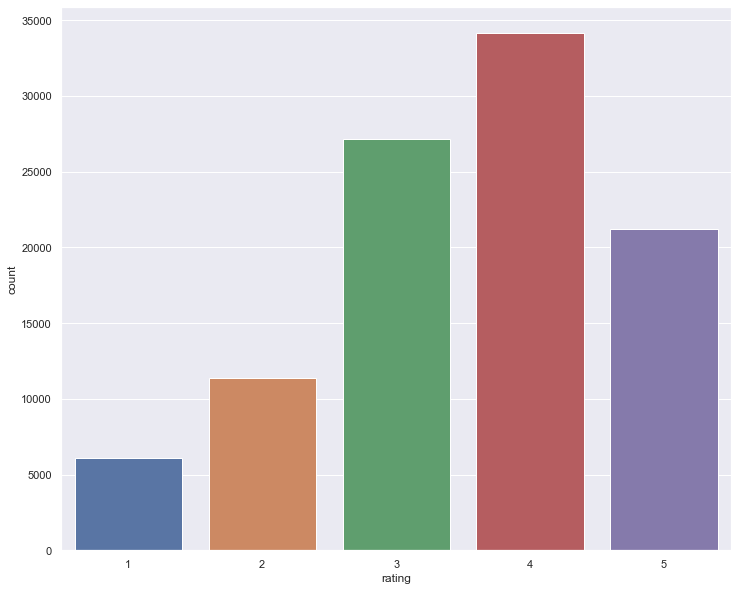

In [89]:
# Univariate Plot of Movie rating using a Count Plot
plt.figure(figsize=(12,10))
sns.countplot(movie_ratings['rating'])

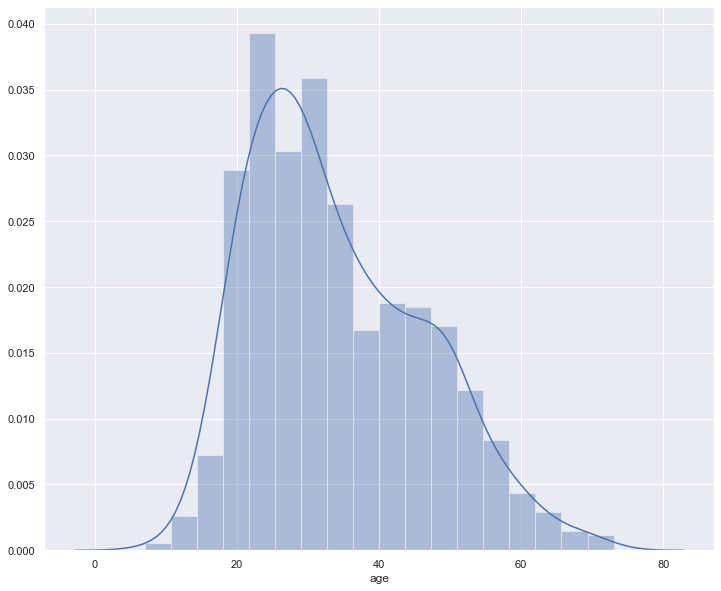

In [90]:
# Distribution of the Age column in the User info data
plt.figure(figsize=(12,10))
sns.distplot (user_info['age'])

In [91]:
#Create release year column from release date column using the split method
movie_info['release year']= movie_info['release date'].str.split(pat = '-').str[-1]
movie_info.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


TypeError: unsupported operand type(s) for /: 'str' and 'int'

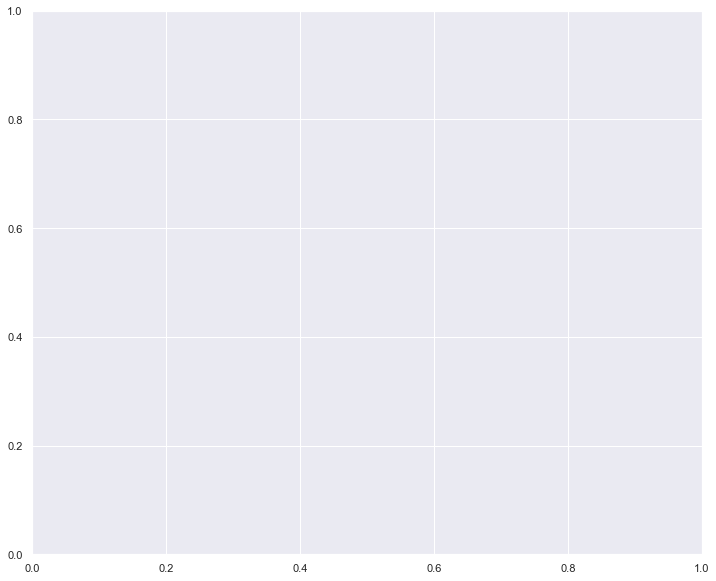

In [92]:
# Distribution plot for 'release year 
plt.figure(figsize=(12,10))
sns.distplot(movie_info['release year'], kde=False);

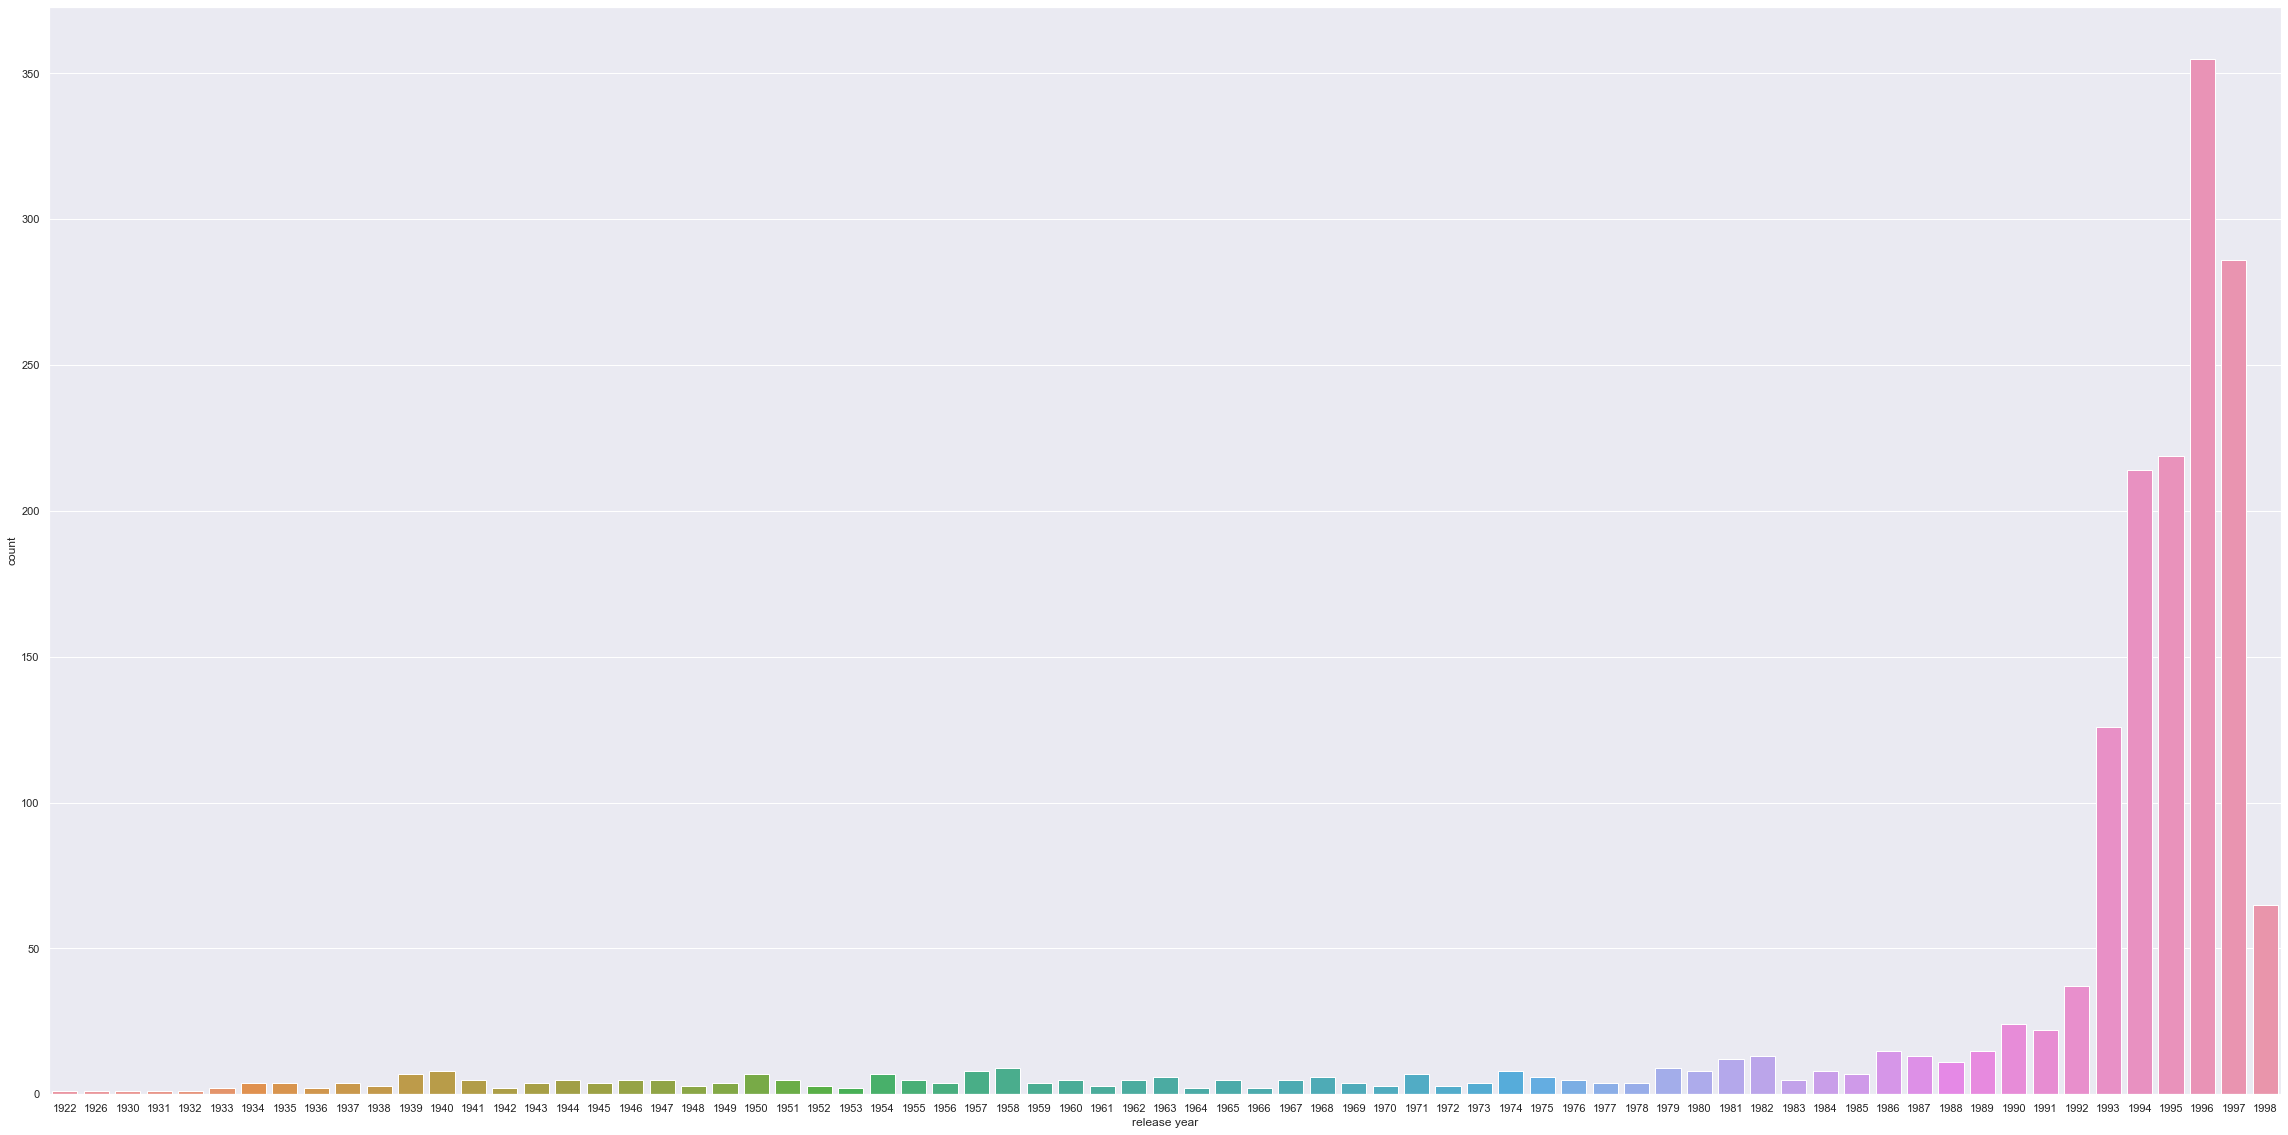

In [94]:
#Univariate Analysis of release year using Count plot.
plt.figure(figsize = (40,20))
sns.countplot( movie_info ['release year']);

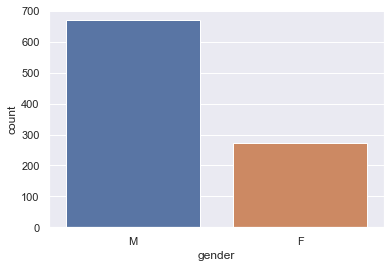

In [95]:
# Univariate Plot for Gender column in User info
sns.countplot(user_info['gender'])

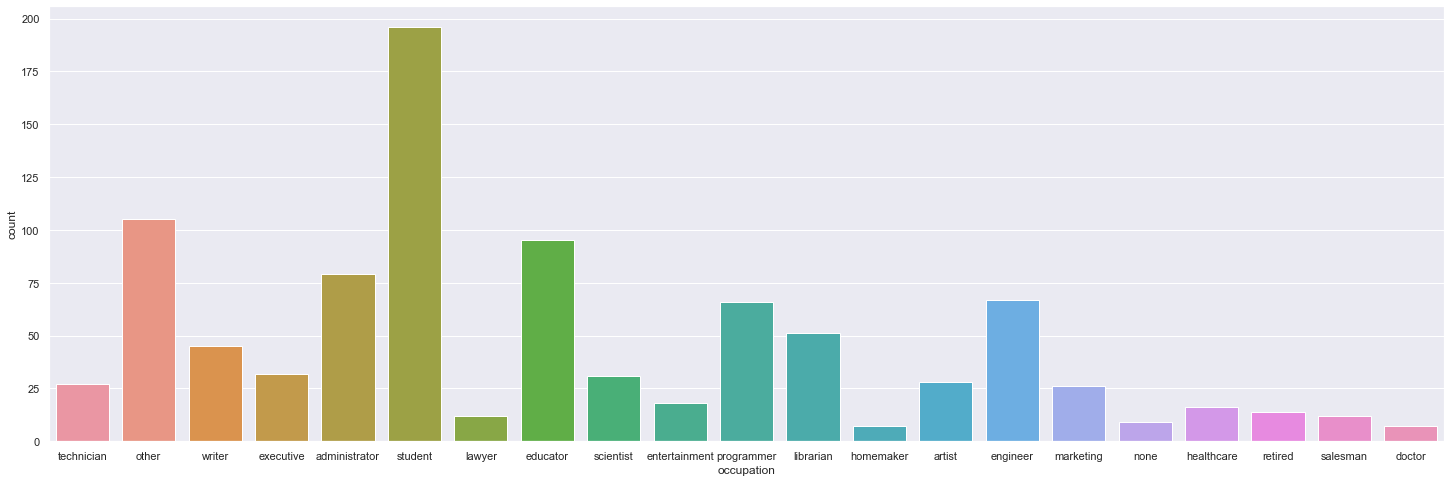

In [96]:
#Univariate Analysis of Users' Occupation in the User info
plt.figure(figsize=(25,8))
sns.countplot(user_info['occupation'])

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [97]:
#Your answer here
# genre popularity dataframe contains number of genre releases per year
genre_popularity = movie_info.groupby(by = 'release year').sum()
genre_popularity.head(100)

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,,,
1922,675,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,1542,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,617,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,656,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,1124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,189000,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,183514,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,322295,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


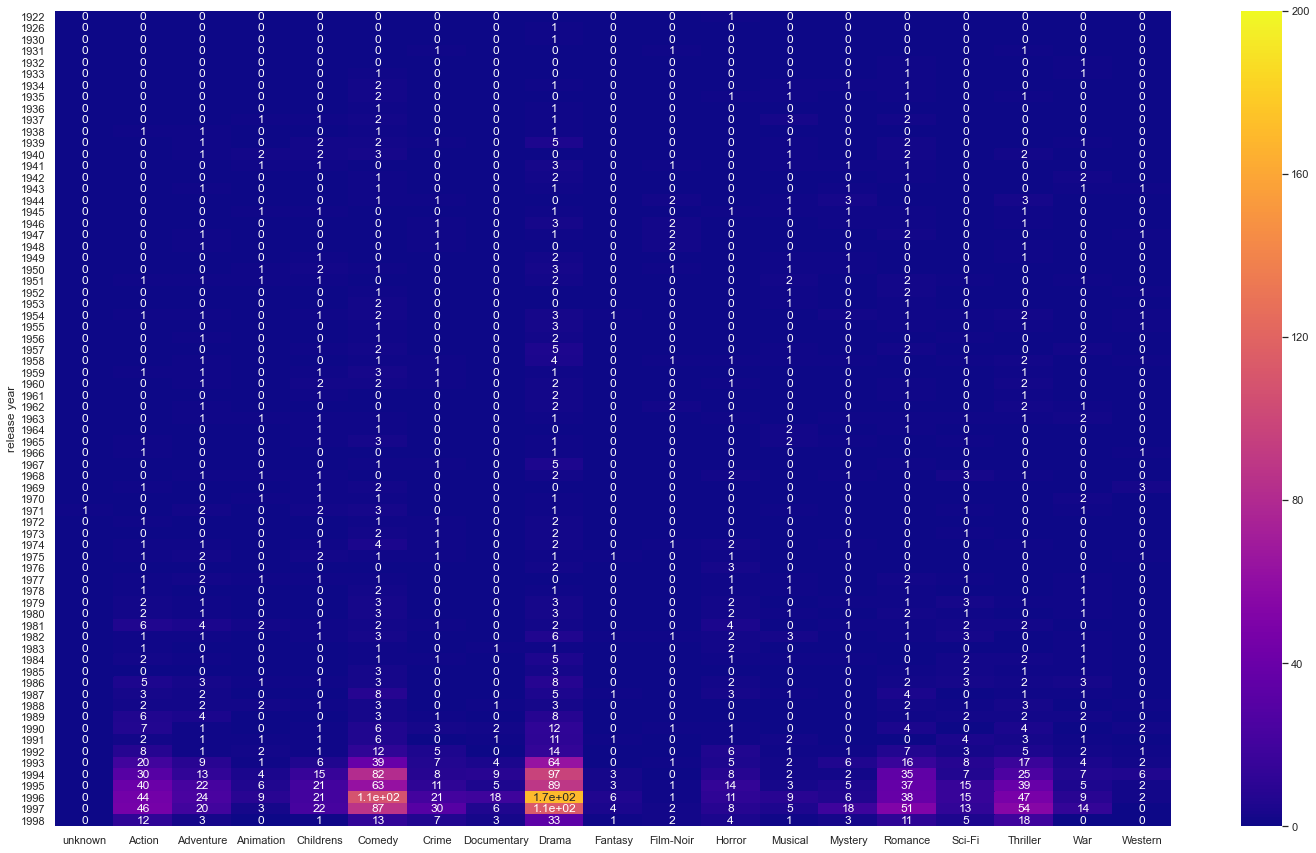

In [98]:
#drop the movie id column data as it is not a type of movie genre
genre_popularity_1 = genre_popularity.drop(columns = ['movie id'])
# Visualize the genre popularity data using a heatmap 
plt.figure(figsize = (25,15))
sns.heatmap(genre_popularity_1,annot=True,cmap='plasma',vmin=0,vmax=200)

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [99]:
#your answer here
df_rating = movie_ratings.groupby('movie id')[['rating']].count() # to get a dataframe that shows the number of ratings
df_rating.rename(columns = {'rating':'No. of ratings'},inplace = True) # rename the rating column to reflect number of ratings
df_100plus = df_rating[df_rating['No. of ratings']>100] # dataframe of movies with more than 100 ratings
df_average_rating = movie_ratings.groupby('movie id')[['rating']].mean() # dataframe of movies and their average rating
df_average_rating.rename(columns = {'rating': 'average rating'}, inplace = True) # rename the rating column to average ratings
df_movie_titles = movie_info[['movie id','movie title']] # dataframe of movies, movie ids and titles
df_movie_titles.set_index('movie id', inplace = True) # reset data frame index to movie ids
# combine all data frames to form a comprehensive data frame containing movie id, titles, no. of ratings, ave. ratings 
df_100plus_complete = pd.merge(df_movie_titles,df_100plus, how = 'inner', on = 'movie id').merge(df_average_rating, how = 'inner', on = 'movie id')
# Provide Top 25 movies according to average ratings
df_100plus_complete.sort_values(by ='average rating', ascending = False).head(25)


,movie title,No. of ratings,average rating
movie id,,,
408,"Close Shave, A",112,4.491071
318,Schindler's List,298,4.466443
169,"Wrong Trousers, The",118,4.466102
483,Casablanca,243,4.456790
64,"Shawshank Redemption, The",283,4.445230
603,Rear Window,209,4.387560
12,"Usual Suspects, The",267,4.385768
50,Star Wars,583,4.358491
178,12 Angry Men,125,4.344000


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [100]:
# Get complete dataframe which is an intersection of movie ratings, movie info and user info data
df_complete = pd.merge(user_info,movie_ratings, how = 'inner', on = 'user id').merge(movie_info, how = 'inner', on = 'movie id')
df_complete.head()

,user id,age,gender,occupation,zip code,movie id,rating,timestamp,movie title,release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,1994
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,1994
2,18,35,F,other,37212,61,4,880130803,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,1994
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,1994
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,1994


In [101]:
# Drop all non - genre columns from data frame
df_complete.drop(columns = ['user id','age','movie id','rating','timestamp','zip code'], inplace = True)
# Group data by Gender to view gender distribution across genres
df_gender_grouped = df_complete.groupby ('gender').sum().T
# Calculate percentage distribution of Male and Females across all the genres
gender_dist = df_gender_grouped.apply (lambda x: x/x.sum()*100).T
gender_dist.head()



,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,,
F,0.000000,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.470960,4.076274,0.690862
M,0.000629,12.680240,6.679045,1.642698,3.115461,13.697958,3.940586,0.359379,18.181074,0.622463,0.848412,2.593070,2.210404,2.474116,8.561538,6.357428,10.564874,4.537244,0.933379


In [102]:
#Get data frame showing data for only Drama, Sci-Fi and Romance 
gender_dist[['Drama','Sci-Fi','Romance']]

,Drama,Sci-Fi,Romance
gender,,,
F,20.498687,4.895626,10.908549
M,18.181074,6.357428,8.561538


#### Conclusion:



From the Analysis above, we can see that the percentage of Men and Women that watch the Drama, Sci-Fi and Romance genres. 
Based on the results all three statements are false.
1) Men watch more Drama than Women : False (18.18% of men watch drama while 20.50% of Women watch Drama)
2) Women watch more Sci-Fi than Men: False (the pecentage of men that watch Sci - Fi [6.36%] is more than that of women [5.0%])
3) Men watch more Romance than Women: False (8.56% of men watch Romance while 10.91% of women watch Romance)